## Miniproject MLFC

In this mini-project is based on checking the access of healthcare in Kenya.


### Access

In [2]:
%%capture
%pip install osmnx

import osmnx as ox
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

In [24]:
import pandas as pd
pd_health_facilities = pd.read_csv("/content/healthcare_facilities.csv", encoding='latin1')

In [29]:
pd_health_facilities.head()

,OBJECTID,Facility_N,Type,Owner,County,Sub_County,Division,Location,Sub_Locati,Constituen,Nearest_To,Latitude,Longitude
0,1,CDF Kiriari Dispensary,Dispensary,Ministry of Health,Embu,Manyatta,Manyatta,Ruguru,Ruguru,MANYATTA,Kiriari -market,-0.39940,37.47605
1,2,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,Nairobi,Mathare,Huruma,Huruma,Huruma,MATHARE,Kariobangi Market,-1.26174,36.87765
2,3,12 Engineers,Dispensary,Ministry of Health,Kiambu,Thika West,,,,JUJA,,-1.07354,37.14413
3,4,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,Kajiado,Kajiado North,Ongata Rongai,Gataka,Gataka,KAJIADO NORTH,Ongata Ronga,-1.37570,36.72277
4,5,8Th Street Clinic,Medical Clinic,Private Enterprise (Institution),Kajiado,Kajiado North,Isinya,Isinya,Isinya Township,KAJIADO NORTH,Isinya,-1.41187,36.50854


In [40]:
pd_health_facilities['Owner'].unique().tolist()


['Ministry of Health',
 'Private Practice - Unspecified',
 'Private Practice - Clinical Officer',
 'Private Enterprise (Institution)',
 'Private Practice - General Practitioner',
 'Private Practice - Medical Specialist',
 'Private Practice - Nurse / Midwife',
 'Non-Governmental Organizations',
 'Other Faith Based',
 'Christian Health Association of Kenya',
 'Supreme Council for Kenya Muslims',
 'Local Authority',
 'Other Public Institution',
 'Kenya Episcopal Conference-Catholic Secretariat',
 'Company Medical Service',
 'Community',
 'Academic (if registered)',
 'Parastatal',
 'Community Development Fund',
 'State Coorporation',
 'Local Authority T Fund',
 'Humanitarian Agencies']

<Axes: xlabel='Owner'>

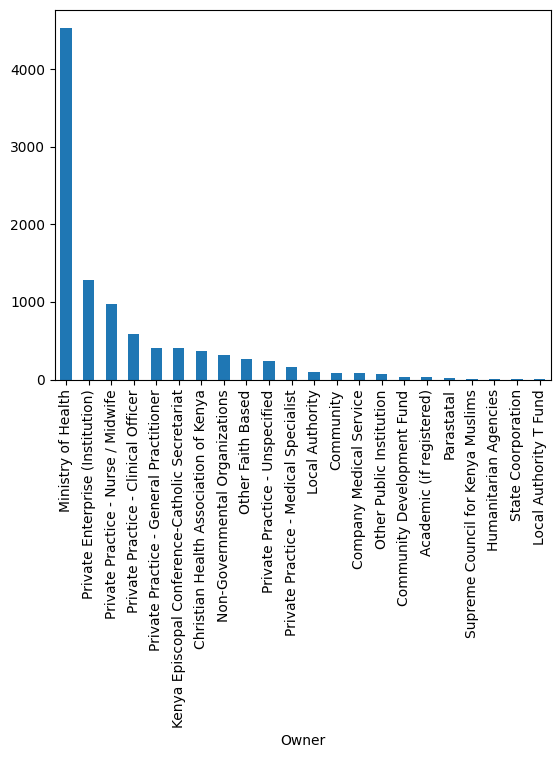

In [46]:
facilities = pd_health_facilities['Owner'].value_counts()
facilities.plot(kind="bar")


In [44]:
facilities

,count
Owner,
Ministry of Health,4534
Private Enterprise (Institution),1284
Private Practice - Nurse / Midwife,968
Private Practice - Clinical Officer,583
Private Practice - General Practitioner,411
Kenya Episcopal Conference-Catholic Secretariat,403
Christian Health Association of Kenya,370
Non-Governmental Organizations,319
Other Faith Based,262


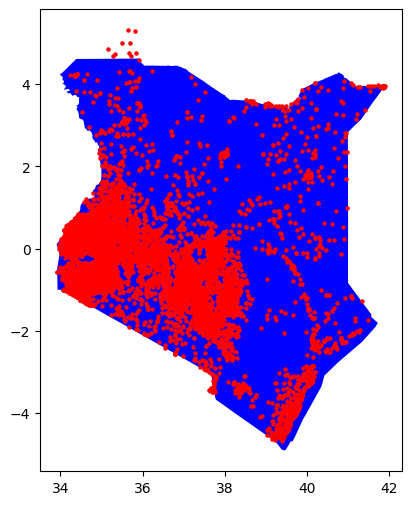

In [33]:
from shapely.geometry import Point
import geopandas as gpd


place_name = "Kenya"

placestub = place_name.lower().replace(' ', '-').replace(',','')
kenya = ox.geocode_to_gdf(placestub)

lat = pd_health_facilities['Latitude']
long = pd_health_facilities['Longitude']
points = gpd.GeoDataFrame(
    geometry= [Point(xy) for xy in zip(long, lat) ],
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(6,6))
kenya.plot(ax=ax, color="blue", markersize=5, alpha=1)
points.plot(ax=ax, color='red', markersize=5, alpha=1)
plt.show()

In [34]:
pd_2019_population = pd.read_csv("/content/2019-population_census-report-per-county.csv", encoding='latin1')

In [35]:
pd_2019_population.head()

,County,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35
3,Busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28
4,Elgeyo-Marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12


In [36]:
len(pd_2019_population)

47

## Assess

## Address